<b> IMPORTING LIBRARIES <b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
sns.set()


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import euclidean
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings.filterwarnings('ignore')

<b>LOADING DATASET <b>

In [2]:
df= pd.read_csv('C:/Users/wojci/OneDrive/Pulpit/Statystyka/creditcard.csv')

In [3]:
df.head() #header of DataFrame

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

<b> DATA PREPROCESSING <b>

In [4]:
df.shape # 284807 rows oraz 31 columns

(284807, 31)

In [5]:
df.columns # Column names 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.duplicated().sum() # Number of duplicated values

1081

In [7]:
df.drop_duplicates(inplace=True) # Removing duplicated values

In [8]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

<b> EXPLORATORY DATA ANALYSIS (EDA)<b>

In [9]:
df[df['Class'] == 1].describe().round(3).T # Granular statistics for frauds

count       mean        std      min        25%        50%  \
Time    473.0  80450.514  48636.180  406.000  41203.000  73408.000   
V1      473.0     -4.498      6.593  -30.552     -5.604     -2.272   
V2      473.0      3.406      4.123   -8.402      1.145      2.617   
V3      473.0     -6.730      6.910  -31.104     -7.927     -4.875   
V4      473.0      4.473      2.872   -1.313      2.289      4.100   
V5      473.0     -2.957      5.279  -22.106     -4.279     -1.372   
V6      473.0     -1.433      1.715   -6.406     -2.450     -1.420   
V7      473.0     -5.176      6.858  -43.557     -6.989     -2.902   
V8      473.0      0.953      5.586  -41.044     -0.162      0.618   
V9      473.0     -2.522      2.465  -13.434     -3.797     -2.099   
V10     473.0     -5.453      4.706  -24.588     -7.298     -4.466   
V11     473.0      3.716      2.673   -1.702      1.929      3.526   
V12     473.0     -6.103      4.582  -18.684     -8.602     -5.437   
V13     473.0     -0.094      1.108   -3.128     -0.978     -0.064   
V14     473.0     -6.836      4.253  -19.214     -9.505     -6.591   
V15     473.0     -0.073      1.046   -4.499     -0.638     -0.039   
V16     473.0     -4.001      3.832  -14.130     -6.469     -3.303   
V17     473.0     -6.463      6.966  -25.163    -11.589     -5.158   
V18     473.0     -2.157      2.902   -9.499     -4.569     -1.418   
V19     473.0      0.669      1.534   -3.682     -0.301      0.648   
V20     473.0      0.405      1.289   -4.128     -0.160      0.286   
V21     473.0      0.467      2.731  -22.798      0.028      0.574   
V22     473.0      0.087      1.181   -8.887     -0.522      0.055   
V23     473.0     -0.096      1.509  -19.254     -0.342     -0.075   
V24     473.0     -0.107      0.518   -2.028     -0.437     -0.061   
V25     473.0      0.041      0.807   -4.782     -0.320      0.078   
V26     473.0      0.050      0.463   -1.153     -0.263      0.013   
V27     473.0      0.214      1.246   -7.263     -0.016      0.395   
V28     473.0      0.078      0.533   -1.869     -0.097      0.146   
Amount  473.0    123.872    260.211    0.000      1.000      9.820   
Class   473.0      1.000      0.000    1.000      1.000      1.000   

               75%         max  
Time    129095.000  170348.000  
V1          -0.361       2.132  
V2           4.572      22.058  
V3          -2.171       2.250  
V4           6.291      12.115  
V5           0.261      11.095  
V6          -0.414       6.474  
V7          -0.907       5.803  
V8           1.709      20.007  
V9          -0.788       3.354  
V10         -2.447       4.031  
V11          5.224      12.019  
V12         -2.825       1.376  
V13          0.695       2.815  
V14         -4.252       3.442  
V15          0.634       2.471  
V16         -1.142       3.140  
V17         -1.129       6.739  
V18          0.116       3.790  
V19          1.661       5.228  
V20          0.821      11.059  
V21          1.193      27.203  
V22          0.616       8.362  
V23          0.288       5.466  
V24          0.282       1.091  
V25          0.464       2.208  
V26          0.396       2.745  
V27          0.821       3.052  
V28          0.372       1.779  
Amount     105.890    2125.870  
Class        1.000       1.000

In [10]:
df[df['Class'] == 0].describe().round(3).T # Granular statistics for non-frauds

count       mean        std      min        25%        50%  \
Time    283253.0  94835.058  47475.551    0.000  54233.000  84711.000   
V1      283253.0      0.013      1.922  -56.408     -0.913      0.023   
V2      283253.0     -0.010      1.634  -72.716     -0.601      0.063   
V3      283253.0      0.013      1.458  -48.326     -0.884      0.182   
V4      283253.0     -0.010      1.399   -5.683     -0.852     -0.024   
V5      283253.0      0.007      1.356 -113.743     -0.688     -0.053   
V6      283253.0      0.001      1.330  -26.161     -0.768     -0.274   
V7      283253.0      0.010      1.177  -31.765     -0.550      0.042   
V8      283253.0     -0.002      1.157  -73.217     -0.209      0.022   
V9      283253.0      0.003      1.087   -6.291     -0.642     -0.051   
V10     283253.0      0.008      1.036  -14.741     -0.533     -0.092   
V11     283253.0     -0.006      1.002   -4.797     -0.763     -0.034   
V12     283253.0      0.009      0.945  -15.145     -0.403      0.141   
V13     283253.0      0.001      0.995   -5.792     -0.648     -0.013   
V14     283253.0      0.012      0.894  -18.392     -0.423      0.051   
V15     283253.0      0.001      0.915   -4.391     -0.581      0.049   
V16     283253.0      0.008      0.845  -10.116     -0.464      0.068   
V17     283253.0      0.011      0.749  -17.098     -0.483     -0.065   
V18     283253.0      0.005      0.825   -5.367     -0.497     -0.001   
V19     283253.0     -0.001      0.811   -7.214     -0.456      0.003   
V20     283253.0     -0.000      0.769  -54.498     -0.212     -0.063   
V21     283253.0     -0.001      0.716  -34.830     -0.228     -0.030   
V22     283253.0     -0.000      0.724  -10.933     -0.543      0.007   
V23     283253.0      0.000      0.621  -44.808     -0.161     -0.011   
V24     283253.0      0.000      0.606   -2.837     -0.354      0.041   
V25     283253.0     -0.000      0.521  -10.295     -0.317      0.016   
V26     283253.0      0.000      0.482   -2.605     -0.327     -0.052   
V27     283253.0      0.001      0.393  -22.566     -0.071      0.001   
V28     283253.0      0.000      0.328  -15.430     -0.053      0.011   
Amount  283253.0     88.414    250.379    0.000      5.670     22.000   
Class   283253.0      0.000      0.000    0.000      0.000      0.000   

               75%         max  
Time    139308.000  172792.000  
V1           1.317       2.455  
V2           0.797      18.902  
V3           1.028       9.383  
V4           0.734      16.875  
V5           0.612      34.802  
V6           0.398      73.302  
V7           0.571     120.589  
V8           0.324      18.709  
V9           0.597      15.595  
V10          0.455      23.745  
V11          0.737      10.002  
V12          0.618       7.848  
V13          0.663       7.127  
V14          0.493      10.527  
V15          0.650       8.878  
V16          0.524      17.315  
V17          0.399       9.254  
V18          0.502       5.041  
V19          0.457       5.592  
V20          0.133      39.421  
V21          0.185      22.615  
V22          0.528      10.503  
V23          0.148      22.528  
V24          0.440       4.585  
V25          0.350       7.520  
V26          0.240       3.517  
V27          0.091      31.612  
V28          0.078      33.848  
Amount      77.460   25691.160  
Class        0.000       0.000

In [11]:
#Descriptive statistics for fraudulent (1) and non-fraudulent transactions (0) Amount column
df.groupby('Class')['Amount'].describe().T.round(3)

Class           0         1
count  283253.000   473.000
mean       88.414   123.872
std       250.379   260.211
min         0.000     0.000
25%         5.670     1.000
50%        22.000     9.820
75%        77.460   105.890
max     25691.160  2125.870

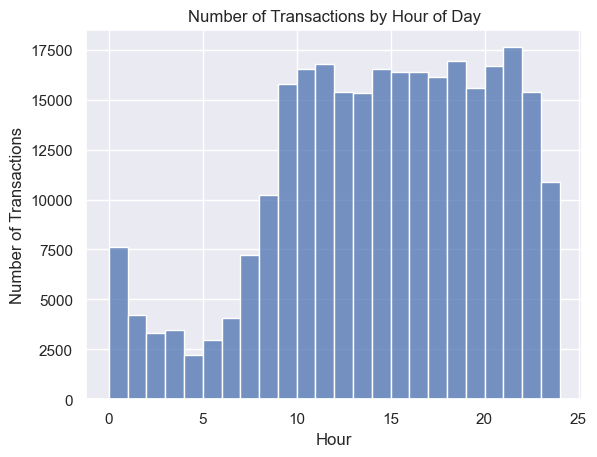

In [12]:
df['Hour'] = (df['Time'] / 3600) % 24 # Creating hour column for hist purposes

sns.histplot(data=df, x='Hour', bins=24, kde=False)
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

In [13]:
df = df.drop('Hour', axis=1) # Deleting hour column 

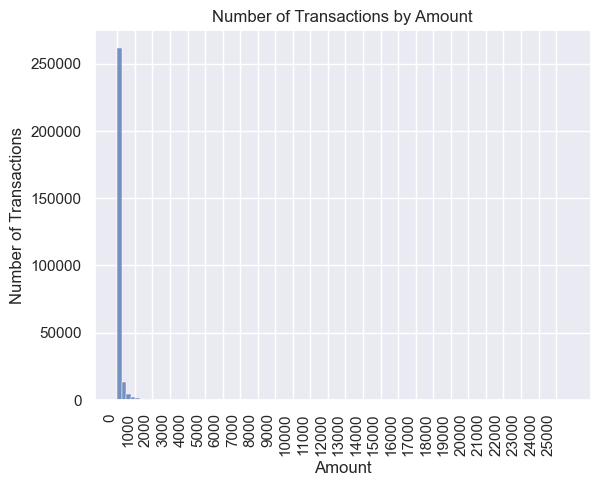

In [14]:
sns.histplot(data=df, x='Amount', bins=100, kde=False)
plt.xticks(range(0, 26000, 1000), rotation=90, ha='right')
plt.title('Number of Transactions by Amount')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.show()

In [15]:
# Only V columns for hist purposes
V= ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

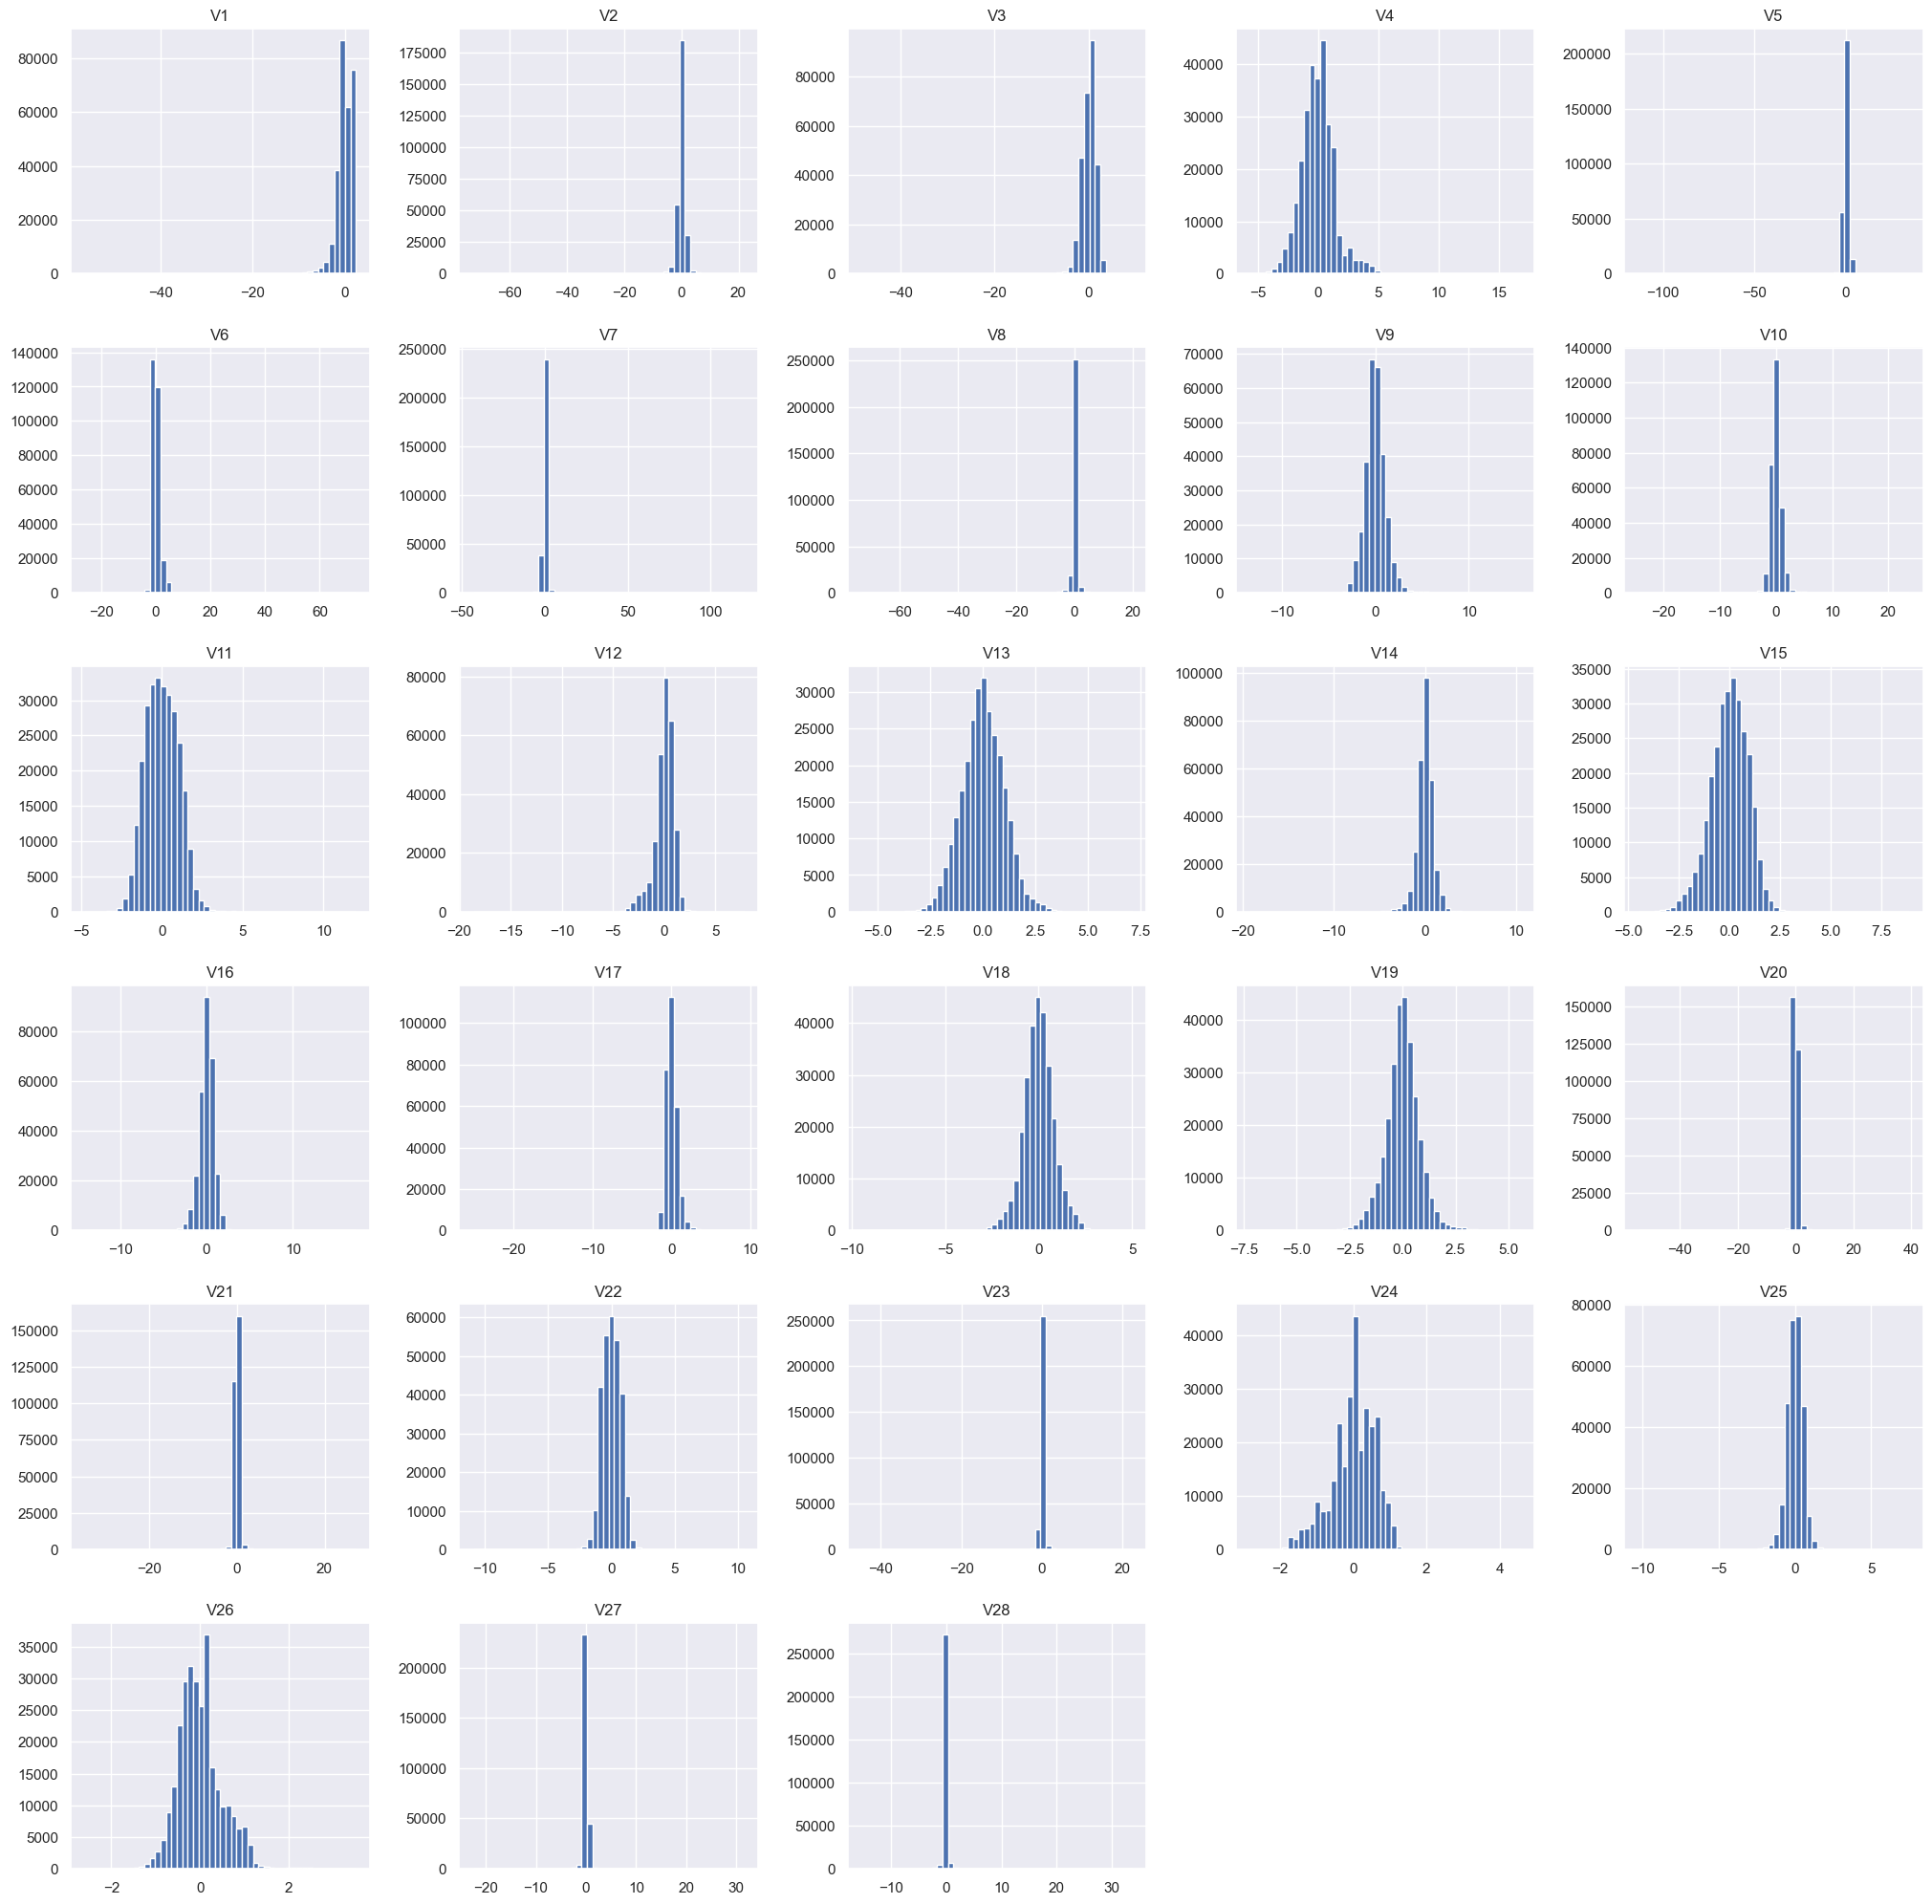

In [16]:
# Histogram for each V column
df[V].hist(figsize = (25, 25), bins=50)
plt.show()

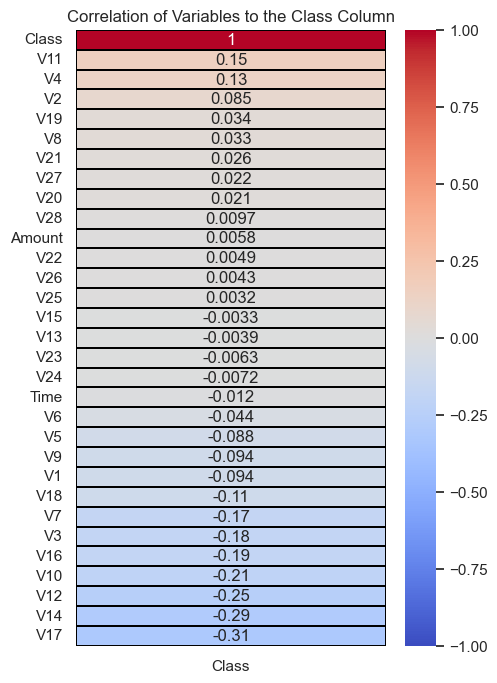

In [17]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['Class'].sort_values(ascending=False).to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black')
plt.title('Correlation of Variables to the Class Column')
plt.show()


In [18]:
df['Hour'] = (df['Time'] / 3600) % 24 # Creating hour column for scatter plot purposes

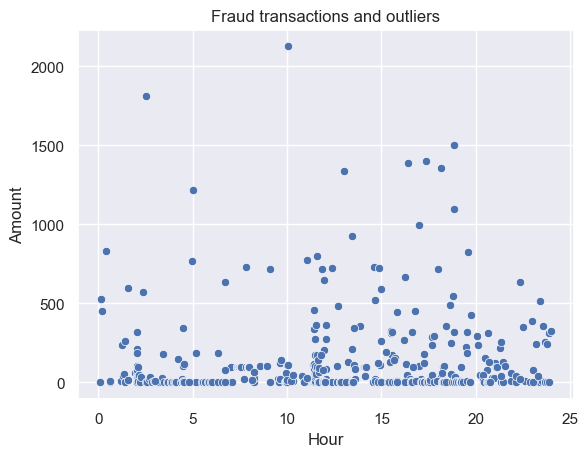

In [19]:
sns.scatterplot(x='Hour', y='Amount', data=df[df['Class'] == 1])
plt.title('Fraud transactions and outliers')
plt.show()

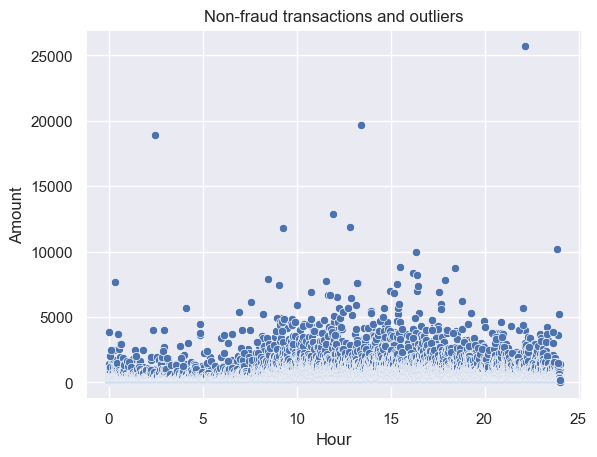

In [20]:
sns.scatterplot(x='Hour', y='Amount', data=df[df['Class'] == 0])
plt.title('Non-fraud transactions and outliers')
plt.show()

In [21]:
df = df.drop('Hour', axis=1) # Deleting the hour column

In [22]:
iqr=iqr(df['Amount'])
lower_threshold = np.quantile(df['Amount'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(df['Amount'], 0.75) + 1.5 * iqr
filer = (df['Amount'] < lower_threshold) | (df['Amount'] > upper_threshold)
print('All outliers', df[filer]['Amount'].count())
print('Outliers for frauds ', df[filer & (df['Class'] == 1)]['Amount'].count())
print('Outliers for non-frauds', df[filer & (df['Class'] == 0)]['Amount'].count())


All outliers 31685
Outliers for frauds  87
Outliers for non-frauds 31598


<b> STATISTICAL THINKING IN PYTHON <b>

Percentiles [  0.76      5.6      22.       77.51    597.78625]


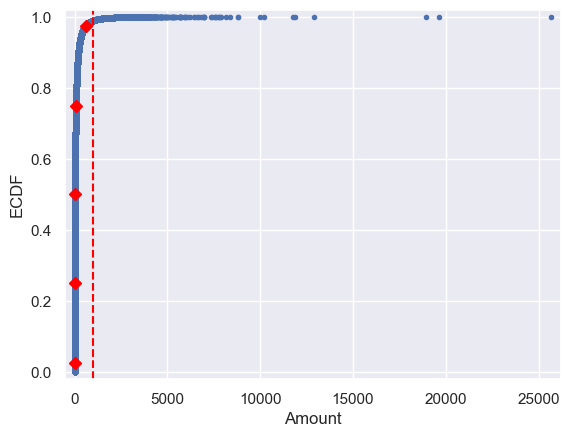

98.92% transactions are less or equal 1000


In [23]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25.,  50.,  75.,  97.5])

# Compute percentiles: ptiles_am 
ptiles_am = np.percentile(df['Amount'].values, percentiles)

# Print the result
print('Percentiles', ptiles_am)

#Empirical Cumulative Distribution Function
x= np.sort(df['Amount'])
y = np.arange(1, len(x) + 1) / len(x)
fig, ax = plt.subplots()
ax.plot(x, y, marker='.', linestyle='none')
ax.axvline(x=1000, color='red', linestyle='--')
ax.set_xlabel('Amount')
ax.set_ylabel('ECDF')
ax.plot(ptiles_am, percentiles/100, marker='D', color='red',linestyle='none')
ax.margins(0.02)
plt.show()

# Number of transactions smaller than 1000
smaller_1000=df['Amount'][df['Amount']<1000].count()/df['Amount'].count()

# Print the result
print(f"{smaller_1000:.2%} transactions are less or equal 1000")

In [24]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

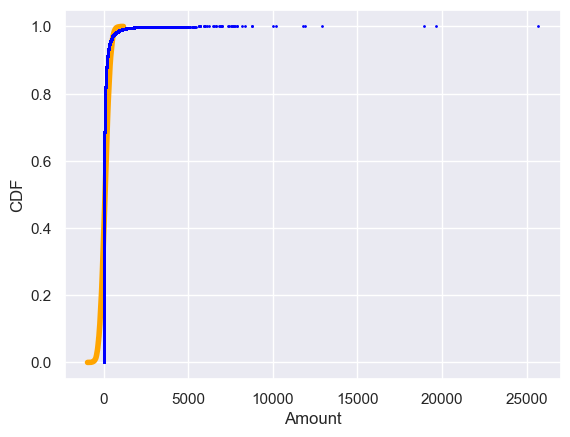

In [25]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df['Amount'].values)
sigma = np.std(df['Amount'].values)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data

x_theor, y_theor =  ecdf(samples)
x,y = ecdf(df['Amount'].values)

# Plot the CDF,ECDF and show the plot
plt.plot(x_theor, y_theor, color='orange', linewidth=4)
plt.plot(x, y, marker='.', linestyle='none', color='blue', markersize=2)
plt.xlabel('Amount')
plt.ylabel('CDF')
plt.show()

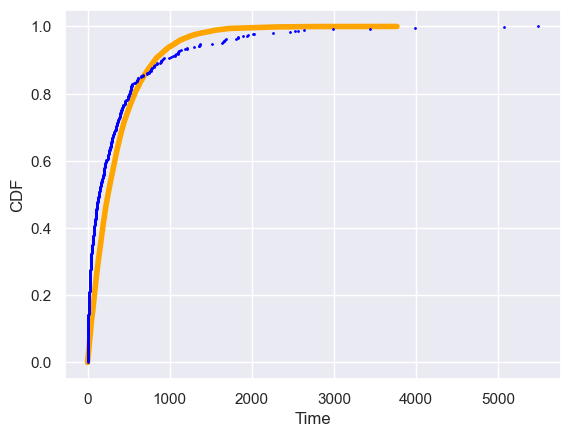

In [26]:
# Only frauds
df1 = df[df['Class'] == 1]

# Sorting df on Time column
df1 = df1.sort_values("Time")

# Calculating the time diff between frauds
df1["Time_diff"] = df1["Time"].diff()

# Deleting Nan values from Time_diff column
df1 = df1.dropna(subset=["Time_diff"])

# Calculating mean time between frauds
mean_time = np.mean(df1["Time_diff"])

# Taking samples from Exponential distribution
samples_exp = np.random.exponential(mean_time, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor =  ecdf(samples_exp)
x,y = ecdf(df1["Time_diff"].values)

# Plot the CDF,ECDF and show the plot
plt.plot(x_theor, y_theor, color='orange', linewidth=4)
plt.plot(x, y, marker='.', linestyle='none', color='blue', markersize=2)
plt.xlabel('Time')
plt.ylabel('CDF')
plt.show()

<b> MACHINE LEARNING <b>

In [27]:
# All frauds: 473 and 5000 non-frauds
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0].sample(n=5000, random_state = 42)
df=pd.concat([fraud, non_fraud]) 

In [28]:
# Separating predicted column from the rest od the data
X= df.iloc[:, :-1]
y= df.iloc[:, -1]

In [29]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('the shape of X_train:' , X_train.shape)
print('the shape of X_test:', X_test.shape)
print('the shape of y_train:', y_train.shape)
print('the shape of y_test:', y_test.shape)
print('number of frauds in the train dataset before SMOTE:',y_train[y_train==1].count())
print('number of non-frauds in the train dataset before SMOTE:',y_train[y_train==0].count())
print('number of frauds in the test dataset:',y_test[y_test==1].count())
print('number of non-frauds in the test dataset:',y_test[y_test==0].count())

the shape of X_train: (3831, 30)
the shape of X_test: (1642, 30)
the shape of y_train: (3831,)
the shape of y_test: (1642,)
number of frauds in the train dataset before SMOTE: 304
number of non-frauds in the train dataset before SMOTE: 3527
number of frauds in the test dataset: 169
number of non-frauds in the test dataset: 1473


<b>LOGISTIC REGRESSION<b>

In [30]:
# Logistic Regression + SMOTE
method= SMOTE(random_state=42)
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
lr = LogisticRegression(solver = "liblinear", random_state = 42)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)

In [31]:
print('the shape of X_train after SMOTE:', X_resampled.shape)
print('the shape of y_train after SMOTE:', y_resampled.shape)
print('number of frauds in the train dataset after SMOTE:',y_resampled[y_resampled==1].count())
print('number of non-frauds in the train dataset after SMOTE:',y_resampled[y_resampled==0].count())

the shape of X_train after SMOTE: (7054, 30)
the shape of y_train after SMOTE: (7054,)
number of frauds in the train dataset after SMOTE: 3527
number of non-frauds in the train dataset after SMOTE: 3527


In [32]:
print('Classifcation report before GridSearchCV:\n', classification_report(y_test, y_pred_lr))
print('Confusion matrix before GridSearchCV:\n',confusion_matrix(y_test,y_pred_lr))
print('accuray score before GridSearchCV:',accuracy_score(y_test, y_pred_lr))

Classifcation report before GridSearchCV:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1473
           1       0.87      0.86      0.86       169

    accuracy                           0.97      1642
   macro avg       0.93      0.92      0.92      1642
weighted avg       0.97      0.97      0.97      1642

Confusion matrix before GridSearchCV:
 [[1451   22]
 [  24  145]]
accuray score before GridSearchCV: 0.9719853836784409


In [33]:
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

In [34]:
def plot_roc_curve(y_true, y_pred):
    # Binary classification
    from sklearn.metrics import roc_curve
    fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

    fig = go.Figure(
        data=[
            go.Scatter(x=roc['fpr'], y=roc['tpr'],
                    line_color='red',
                    name='ROC Curve'),
            go.Scatter(x=[0, 1], y=[0, 1],
                    mode='lines', 
                    line_dash='dash', 
                    line_color='navy')
        ],
        layout=go.Layout(xaxis_title='False Positive Rate',
                         yaxis_title='True Positive Rate',
                         title='ROC Curve',
                         showlegend=False,
                         width=700))
    fig.show()

In [35]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_lr))

In [36]:
# Hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='f1')

grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [37]:
grid_search_lr.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [38]:
#Logistic Regression with hyperparameters
lr = LogisticRegression(solver = "liblinear", C=0.1, penalty='l1', random_state = 42)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)


In [39]:
print('Classifcation report after GridSearchCV:\n', classification_report(y_test, y_pred_lr))
print('Confusion matrix after GridSearchCV:\n', confusion_matrix(y_test,y_pred_lr))
print('accuray score after GridSearchCV:',accuracy_score(y_test, y_pred_lr))

Classifcation report after GridSearchCV:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1473
           1       0.92      0.86      0.89       169

    accuracy                           0.98      1642
   macro avg       0.95      0.92      0.94      1642
weighted avg       0.98      0.98      0.98      1642

Confusion matrix after GridSearchCV:
 [[1460   13]
 [  24  145]]
accuray score after GridSearchCV: 0.9774665042630938


In [40]:
#For ROC curve
fpr, tpr, tresh = roc_curve(y_test, y_pred_lr, pos_label=1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

In [41]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_lr))
plot_roc_curve(y_test, y_pred_lr)
print('Area Under the Curve', roc_auc_score(y_test, y_pred_lr).round(3))

Area Under the Curve 0.925


<b>RANDOM FOREST<b>

In [42]:
#Random Forest Model
rfc = RandomForestClassifier(random_state=42) 
rfc.fit(X_train, y_train) 
y_pred_rfc= rfc.predict(X_test)

In [43]:
print('Classifcation report before GridSearchCV:\n', classification_report(y_test, y_pred_rfc))
print('Confusion matrix before GridSearchCV:\n' , confusion_matrix(y_test, y_pred_rfc))
print('accuray score before GridSearchCV:',accuracy_score(y_test, y_pred_rfc))

Classifcation report before GridSearchCV:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1473
           1       0.99      0.85      0.91       169

    accuracy                           0.98      1642
   macro avg       0.98      0.92      0.95      1642
weighted avg       0.98      0.98      0.98      1642

Confusion matrix before GridSearchCV:
 [[1471    2]
 [  26  143]]
accuray score before GridSearchCV: 0.9829476248477467


In [44]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rfc))

In [45]:
# Hyperparameter tuning
''''param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced',{0: 1, 1: 10}]}

grid_search_rfc = GridSearchCV(estimator = rfc, 
                                 param_grid = param_grid, 
                                 cv = 5,
                                 n_jobs = -1, 
                                 scoring='f1')

grid_search_rfc.fit(X_train, y_train)'''

"'param_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [10, 20, 30, None],\n    'min_samples_split': [2, 5, 10],\n    'class_weight': ['balanced',{0: 1, 1: 10}]}\n\ngrid_search_rfc = GridSearchCV(estimator = rfc, \n                                 param_grid = param_grid, \n                                 cv = 5,\n                                 n_jobs = -1, \n                                 scoring='f1')\n\ngrid_search_rfc.fit(X_train, y_train)"

In [46]:
#grid_search_rfc.best_params_

In [47]:
#Random Forest Model with Hyperparameters
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, class_weight={0: 1, 1: 10}, random_state=42) 
rfc.fit(X_train, y_train) 
y_pred_rfc= rfc.predict(X_test)

In [48]:
print('Classifcation report after GridSearchCV:\n', classification_report(y_test, y_pred_rfc))
print('Confusion matrix after GridSearchCV:\n' , confusion_matrix(y_test, y_pred_rfc))
print('accuray score after GridSearchCV:',accuracy_score(y_test, y_pred_rfc))

Classifcation report after GridSearchCV:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1473
           1       1.00      0.85      0.92       169

    accuracy                           0.98      1642
   macro avg       0.99      0.92      0.95      1642
weighted avg       0.98      0.98      0.98      1642

Confusion matrix after GridSearchCV:
 [[1473    0]
 [  26  143]]
accuray score after GridSearchCV: 0.9841656516443362


In [49]:
#For ROC curve
fpr, tpr, tresh = roc_curve(y_test, y_pred_rfc, pos_label=1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

In [50]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rfc))
plot_roc_curve(y_test, y_pred_rfc)
print('Area Under the Curve', roc_auc_score(y_test, y_pred_rfc).round(3))

Area Under the Curve 0.923


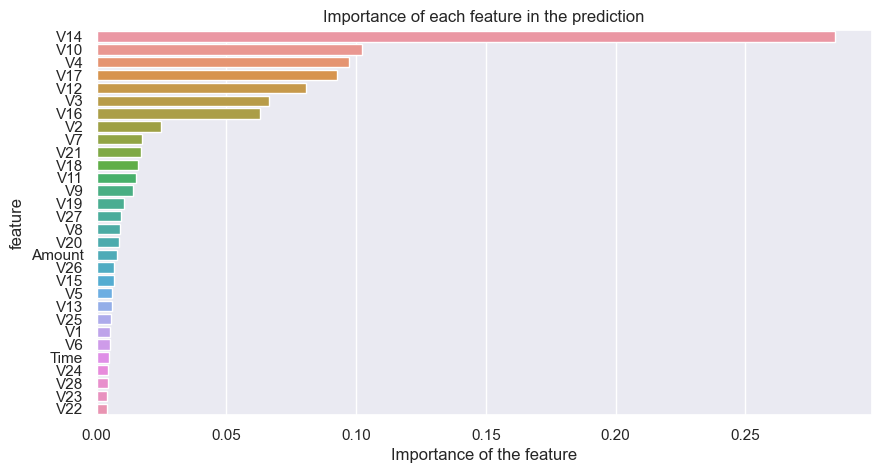

In [51]:
feature_imp = pd.Series(rfc.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance of the feature')
plt.ylabel('feature')
plt.title('Importance of each feature in the prediction')
plt.show()

<b>VOTING CLASSIFIER<b>

In [52]:
ensemble_model = VotingClassifier(estimators=[('lr', lr), ('rfc', rfc)], voting='hard', weights=[1, 4])
ensemble_model.fit(X_train, y_train)
y_pred_vc = ensemble_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred_vc))
print(confusion_matrix(y_test, y_pred_vc))
print('accuray score is:',accuracy_score(y_test, y_pred_vc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1473
           1       1.00      0.85      0.92       169

    accuracy                           0.98      1642
   macro avg       0.99      0.92      0.95      1642
weighted avg       0.98      0.98      0.98      1642

[[1473    0]
 [  26  143]]
accuray score is: 0.9841656516443362


<b> KMEANS <b>

In [54]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

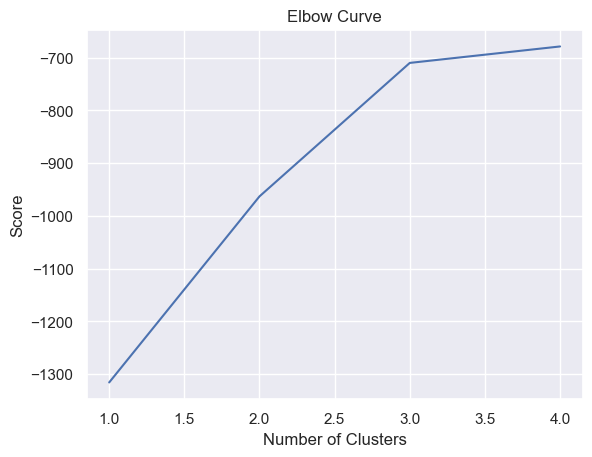

In [55]:
# Define the range of clusters to try
clustno = range(1, 5)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i, random_state=42,batch_size=4096) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [56]:
# Split the scaled data into training and test set.
X_trains, X_tests, y_trains, y_tests = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [57]:
# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=4096).fit(X_tests)

In [58]:
# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_tests)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [euclidean(x, X_test_clusters_centers[cluster]) for x, cluster in zip(X_tests, X_test_clusters)]

In [59]:
# Create fraud predictions based on outliers on clusters 
y_pred_km = np.array(dist)
y_pred_km[dist >= np.percentile(dist, 95)] = 1
y_pred_km[dist < np.percentile(dist, 95)] = 0

In [60]:
#print(roc_auc_score(y_testk, km_y_pred))
print(classification_report(y_tests, y_pred_km))
print(confusion_matrix(y_tests, y_pred_km))
print('accuray score is:',accuracy_score(y_tests, y_pred_km))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1473
           1       0.88      0.43      0.58       169

    accuracy                           0.94      1642
   macro avg       0.91      0.71      0.77      1642
weighted avg       0.93      0.94      0.93      1642

[[1463   10]
 [  96   73]]
accuray score is: 0.9354445797807551


In [61]:
plot_confusion_matrix(confusion_matrix(y_tests, y_pred_km))

<b>ISOLATION FOREST + PCA + t-SNE <b>

In [62]:
outlier = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

outlier.fit(X_test)    

IsolationForest(random_state=42)

In [63]:
y_pred_if = outlier.predict(X_test) 

In [64]:
y_pred_if[y_pred_if == 1] = 0
y_pred_if[y_pred_if == -1] = 1

In [65]:
print(classification_report(y_test, y_pred_if))
print(confusion_matrix(y_test, y_pred_if))
print('accuray score is:',accuracy_score(y_test, y_pred_if))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1473
           1       0.80      0.56      0.66       169

    accuracy                           0.94      1642
   macro avg       0.87      0.77      0.81      1642
weighted avg       0.94      0.94      0.94      1642

[[1449   24]
 [  74   95]]
accuray score is: 0.9403166869671132


In [66]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_if))

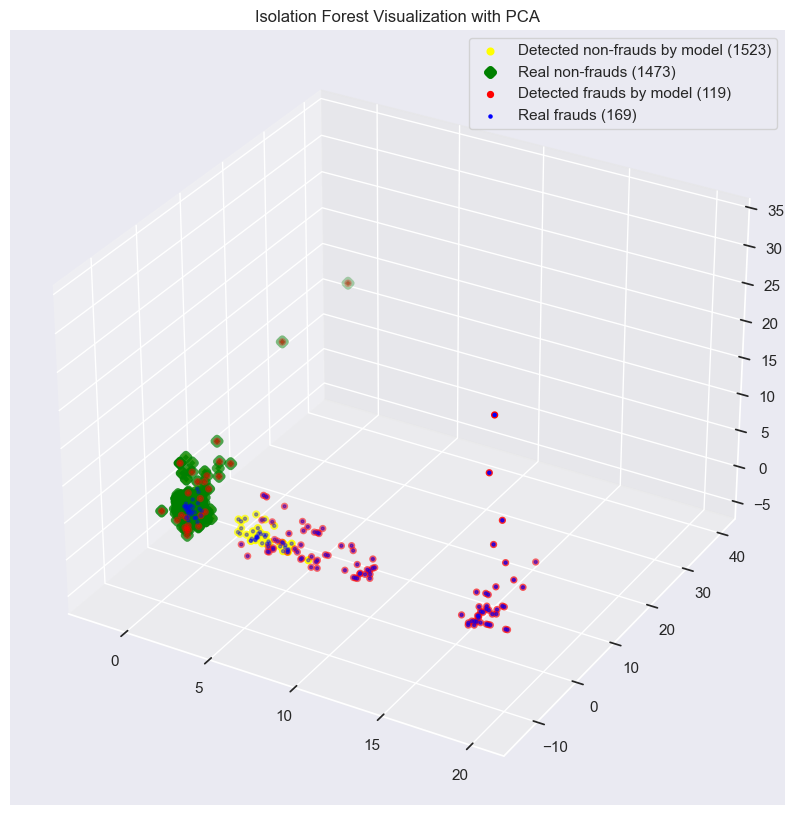

In [67]:
# PCA with 3 components
pca = PCA(n_components=3, random_state=0)

# normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X_test)

# apply PCA
X_reduce = pca.fit_transform(X)

# plot results
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
plt.title('Isolation Forest Visualization with PCA')

# plot detected non-frauds
nonfrauds_mask = y_pred_if == 0
nonfrauds_count = len(X_reduce[nonfrauds_mask])
ax.scatter(X_reduce[nonfrauds_mask, 0], X_reduce[nonfrauds_mask, 1], X_reduce[nonfrauds_mask, 2],
           s=8, lw=3, c="yellow", label=f"Detected non-frauds by model ({nonfrauds_count})")


# plot real non-frauds
non_frauds_mask = y_test == 0
non_frauds_count = len(X_reduce[non_frauds_mask])
ax.scatter(X_reduce[non_frauds_mask, 0], X_reduce[non_frauds_mask, 1], X_reduce[non_frauds_mask, 2], 
           s=10, lw=5, label=f"Real non-frauds ({non_frauds_count})", c="green", marker="D")


# plot detected frauds
frauds_mask = y_pred_if == 1
frauds_count = len(X_reduce[frauds_mask])
ax.scatter(X_reduce[frauds_mask, 0], X_reduce[frauds_mask, 1], X_reduce[frauds_mask, 2],
           s=5, lw=3, c="red", label=f"Detected frauds by model ({frauds_count})")



# plot real frauds
real_frauds_mask = y_test == 1
real_frauds_count = len(X_reduce[real_frauds_mask])
ax.scatter(X_reduce[real_frauds_mask, 0], X_reduce[real_frauds_mask, 1], X_reduce[real_frauds_mask, 2],
           s=5, lw=1, c="blue", label=f"Real frauds ({real_frauds_count})")

           
ax.legend()
plt.show()

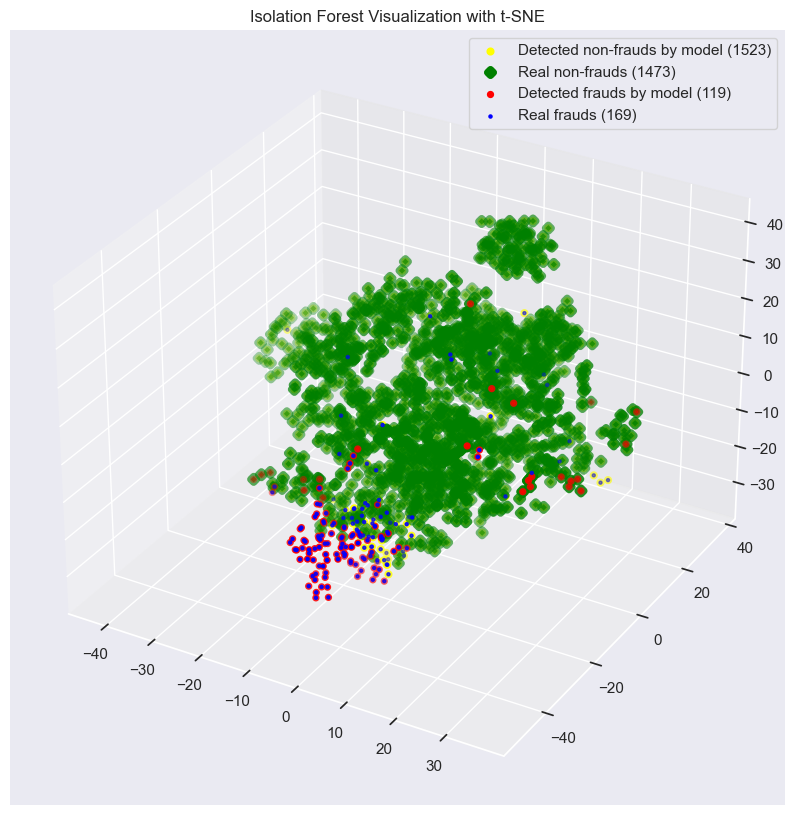

In [68]:
# t-SNE with 3 components
tsne = TSNE(n_components=3,random_state=0)

# normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X_test)

# apply t-SNE
X_reduce = tsne.fit_transform(X)

# plot results
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
plt.title('Isolation Forest Visualization with t-SNE')

# plot detected non-frauds
nonfrauds_mask = y_pred_if == 0
nonfrauds_count = len(X_reduce[nonfrauds_mask])
ax.scatter(X_reduce[nonfrauds_mask, 0], X_reduce[nonfrauds_mask, 1], X_reduce[nonfrauds_mask, 2],
          s=8, lw=3, c="yellow", label=f"Detected non-frauds by model ({nonfrauds_count})")

# plot real non-frauds
non_frauds_mask = y_test == 0
non_frauds_count = len(X_reduce[non_frauds_mask])
ax.scatter(X_reduce[non_frauds_mask, 0], X_reduce[non_frauds_mask, 1], X_reduce[non_frauds_mask, 2], 
           s=10, lw=5, label=f"Real non-frauds ({non_frauds_count})", c="green", marker="D")


# plot detected frauds
frauds_mask = y_pred_if == 1
frauds_count = len(X_reduce[frauds_mask])
ax.scatter(X_reduce[frauds_mask, 0], X_reduce[frauds_mask, 1], X_reduce[frauds_mask, 2],
          s=5, lw=3, c="red", label=f"Detected frauds by model ({frauds_count})")


# plot real frauds
real_frauds_mask = y_test == 1
real_frauds_count = len(X_reduce[real_frauds_mask])
ax.scatter(X_reduce[real_frauds_mask, 0], X_reduce[real_frauds_mask, 1], X_reduce[real_frauds_mask, 2],
           s=5, lw=1, c="blue", label=f"Real frauds ({real_frauds_count})")

        
ax.legend()
plt.show()

<b> DEEP LEARNING <b>

In [69]:
# Normalize the data
scaler = StandardScaler()
X_train_dp = scaler.fit_transform(X_train)
X_test_dp = scaler.transform(X_test)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, input_shape=(30,), activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train_dp, y_train, epochs=15, batch_size=32, validation_data=(X_test_dp, y_test))

# Evaluate the model
score = model.evaluate(X_test_dp, y_test)
print("Loss:", score[0])
print("Accuracy:", score[1])

# Generate predictions on test data
y_pred_dp = model.predict(X_test_dp)
y_pred_dp_classes = (y_pred_dp > 0.5).astype("int32")

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_dp_classes)
print("Confusion matrix:\n", confusion_mtx)


Epoch 1/15
120/120 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.9206 - val_loss: 0.2720 - val_accuracy: 0.8971
Epoch 2/15
120/120 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9206 - val_loss: 0.2164 - val_accuracy: 0.8971
Epoch 3/15
120/120 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9206 - val_loss: 0.1681 - val_accuracy: 0.8971
Epoch 4/15
120/120 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9606 - val_loss: 0.1306 - val_accuracy: 0.9781
Epoch 5/15
120/120 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9843 - val_loss: 0.1085 - val_accuracy: 0.9793
Epoch 6/15
120/120 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9851 - val_loss: 0.0966 - val_accuracy: 0.9817
Epoch 7/15
120/120 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9856 - val_loss: 0.0900 - val_accuracy: 0.9836
Epoch 

In [70]:
print(classification_report(y_test, y_pred_dp_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1473
           1       0.98      0.85      0.91       169

    accuracy                           0.98      1642
   macro avg       0.98      0.93      0.95      1642
weighted avg       0.98      0.98      0.98      1642



In [71]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dp_classes))

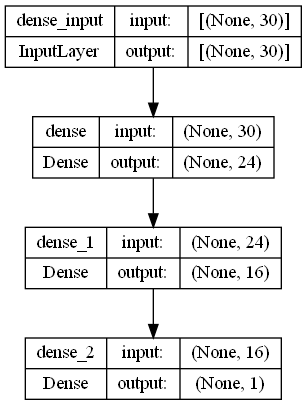

In [72]:
# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True)